## Credit Card Kaggle- Fixing Imbalanced Dataset

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('sample data.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14240 entries, 0 to 14239
Data columns (total 31 columns):
Time      14240 non-null float64
V1        14240 non-null float64
V2        14240 non-null float64
V3        14240 non-null float64
V4        14240 non-null float64
V5        14240 non-null float64
V6        14240 non-null float64
V7        14240 non-null float64
V8        14240 non-null float64
V9        14240 non-null float64
V10       14240 non-null float64
V11       14240 non-null float64
V12       14240 non-null float64
V13       14240 non-null float64
V14       14240 non-null float64
V15       14240 non-null float64
V16       14240 non-null float64
V17       14240 non-null float64
V18       14240 non-null float64
V19       14240 non-null float64
V20       14240 non-null float64
V21       14240 non-null float64
V22       14240 non-null float64
V23       14240 non-null float64
V24       14240 non-null float64
V25       14240 non-null float64
V26       14240 non-null float64


In [5]:
#Create independent and Dependent Features
columns = data.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting 
target = "Class"


In [6]:

# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(14240, 30)
(14240,)


## Exploratory Data Analysis

In [7]:
data.isnull().values.any()

False

In [11]:

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42


Text(0, 0.5, 'Frequency')

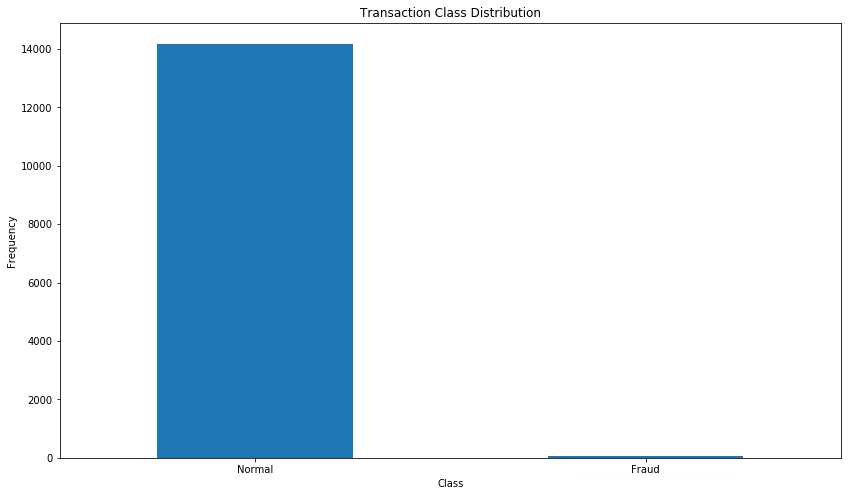

In [12]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [13]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [14]:
print(fraud.shape,normal.shape)

(60, 31) (14180, 31)


In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [16]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)


In [17]:
X_res.shape,y_res.shape

((28254, 30), (28254,))

In [18]:


from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 14180, 1: 60})
Resampled dataset shape Counter({0: 14127, 1: 14127})


In [34]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [35]:
os =  RandomOverSampler(ratio=0.5)
#os =  RandomOverSampler(ratio=0.8)

In [36]:
X_train_res, y_train_res = os.fit_sample(X, Y)

In [37]:
X_train_res.shape,y_train_res.shape

((21270, 30), (21270,))

In [38]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 14180, 1: 60})
Resampled dataset shape Counter({0: 14180, 1: 7090})


In [39]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=0.5)

X_train_res1, y_train_res1 = os_us.fit_sample(X, Y)

In [42]:
X_train_res1.shape,y_train_res1.shape

((21166, 30), (21166,))

In [43]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 14180, 1: 60})
Resampled dataset shape Counter({0: 14128, 1: 7038})


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM